<a href="https://www.kaggle.com/code/alsaniipe/image-preprocessing-through-cv2?scriptVersionId=141305711" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=c479050da6b511d043c82f8f83501917e105a07258b0ad48283b553b2d8829eb
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


**"imutils"** refers to a set of convenience functions for working with images in Python. It's often used to simplify tasks related to computer vision and image processing. The **"imutils"** library provides various functions that make common image processing operations easier to perform.
Some of the typical tasks that "imutils" can assist with include:

**Resizing Images:** The library offers a simple way to resize images while maintaining the aspect ratio.

**Rotating Images:** You can easily rotate images using predefined functions in "imutils."

**Displaying Images:** It provides tools to display images in windows and wait for user interactions.

**Translations:** The library can help you perform translations (shifting) of images.

**Thresholding:** It supports basic thresholding operations to convert images to binary form.

**Edge Detection:** You can apply edge detection algorithms to images using "imutils."

To use "**imutils**," you'll need to install it first. You can install it using pip:

**pip install imutils**


In [2]:
import matplotlib.pyplot as plt
import numpy as pd
import imutils
import cv2
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

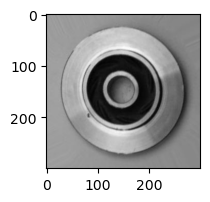

In [49]:
plt.figure(figsize=(4,2))
imagedata= plt.imread("../input/castdata/cast.jpeg")
plt.imshow(imagedata)
plt.show()

# Load an image using imread

In [50]:
len(imagedata.shape)

3

In [51]:
cv2.split(imagedata)

(array([[159, 159, 159, ..., 135, 135, 135],
        [158, 159, 159, ..., 135, 135, 135],
        [158, 158, 158, ..., 135, 135, 135],
        ...,
        [156, 156, 156, ..., 135, 135, 135],
        [157, 157, 157, ..., 135, 135, 135],
        [158, 158, 158, ..., 135, 135, 135]], dtype=uint8),
 array([[159, 159, 159, ..., 135, 135, 135],
        [158, 159, 159, ..., 135, 135, 135],
        [158, 158, 158, ..., 135, 135, 135],
        ...,
        [156, 156, 156, ..., 135, 135, 135],
        [157, 157, 157, ..., 135, 135, 135],
        [158, 158, 158, ..., 135, 135, 135]], dtype=uint8),
 array([[159, 159, 159, ..., 135, 135, 135],
        [158, 159, 159, ..., 135, 135, 135],
        [158, 158, 158, ..., 135, 135, 135],
        ...,
        [156, 156, 156, ..., 135, 135, 135],
        [157, 157, 157, ..., 135, 135, 135],
        [158, 158, 158, ..., 135, 135, 135]], dtype=uint8))

In [99]:
def castimageShow(imageTitle, image):
    if len(image.shape)==3:
        imageVariable=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

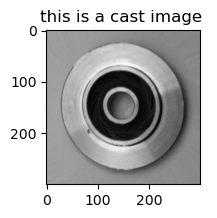

In [100]:
catimageShow("this is a cast image ",imagedata)

In [88]:
def imageHistogram(image,imageTitle,mask=None):
    color_channel= cv2.split(image)
    color_com= ('b','g','r')
    plt.figure(figsize=(4,2))
    plt.title(imageTitle)
    plt.xlabel("Bins")
    plt.ylabel("Pixel information")
    
    for  (color_channel,color_com) in zip(color_channel,color_com):
        histogram= cv2.calcHist([color_channel],[0],None,[256],[0,256])
        plt.plot(histogram, color=color_com)
        plt.xlim([0,256])
        #plt.show()

# Creating a Image Histogram

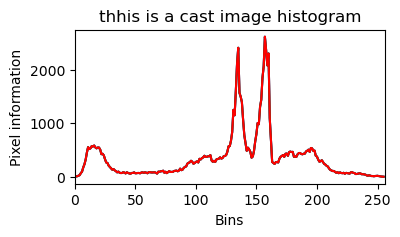

In [89]:
imageHistogram(imagedata,"thhis is a cast image histogram",None)

In [67]:
def imageHistogram(image,imageTitle,mask=None):
    color_channel= cv2.split(image)
    color_com= ('b','g','r')
    plt.figure(figsize=(4,2))
    plt.title(imageTitle)
    plt.xlabel("Bins")
    plt.ylabel("Pixel information")
    
    for  (color_channel,color_com) in zip(color_channel,color_com):
        histogram= cv2.calcHist([color_channel],[0],None,[256],[0,256])
        plt.plot(histogram, color=color_com)
        plt.xlim([0,256])
        plt.show()

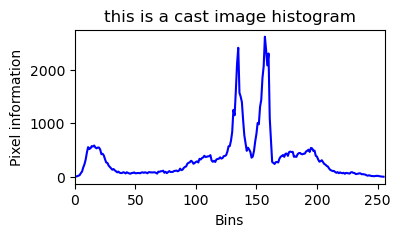

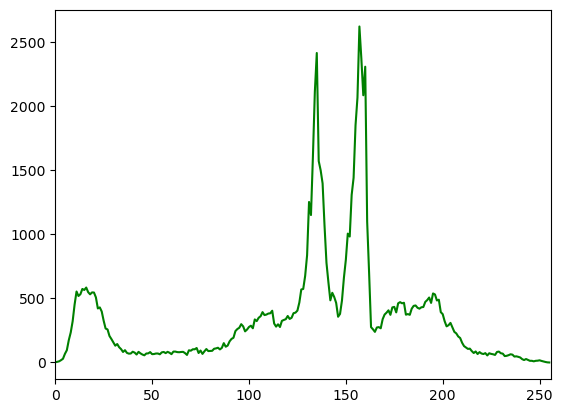

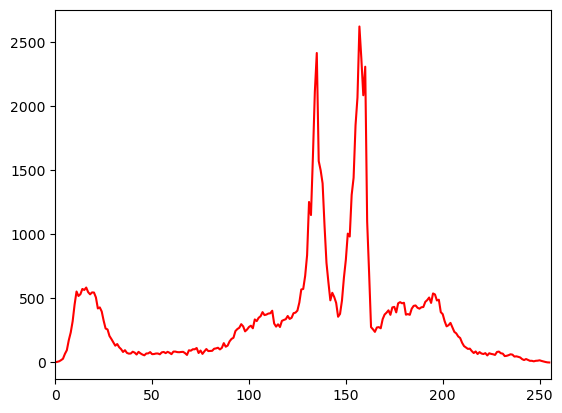

In [68]:
imageHistogram(imagedata,"this is a cast image histogram",None)

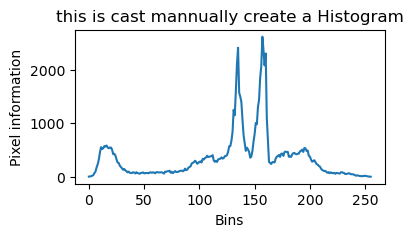

In [69]:
#image_argument= {"image:" ../input/catimage/cat.jpg}
image= cv2.imread("../input/castdata/cast.jpeg")
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sampleHisto= cv2.calcHist([image],[0],None,[256],[0,256])
plt.figure(figsize=(4,2))
plt.title("this is cast mannually create a Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel information")
plt.plot(sampleHisto)
plt.show()

In [ ]:
#image reshape

# Image Scalling
* Normalization
* Standarization

In [71]:
imagedata.shape

(300, 300, 3)

In [76]:
customValueW= 150.0/imagedata.shape[1]
customValueH= 150.0/imagedata.shape[0]

In [79]:
imageDimension=(150, int(imagedata.shape[0]*customValueW))

In [81]:
newimage= cv2.resize(imagedata,imageDimension,interpolation=cv2.INTER_AREA)

In [82]:
newimage.shape

(150, 150, 3)

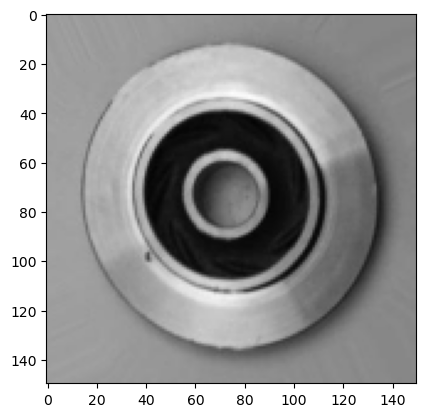

In [83]:
plt.imshow(newimage)
plt.show()

# IMAGE ROTATION

In [90]:
(imageH,imageW)= imagedata.shape[:2]

In [92]:
centerX,centerY=(imageH//2, imageW//2)

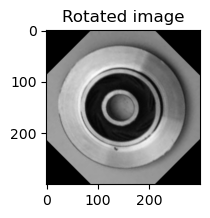

In [97]:
imageRotate= cv2.getRotationMatrix2D((centerX,centerY),45,1.0)
rotateNow= cv2.warpAffine(imagedata,imageRotate,(imageH,imageW))
castimageShow("Rotated image",rotateNow)

# Edge Detection by Using Sobel Operator

In [98]:
#1st step kernel generation 

#kernelGen= -1 if a